In [1]:


import pandas as pd
import gender_guesser.detector as gender

# descriptive statistics code

In [ ]:
df = df_customers_profiles.select_dtypes(include=['number'])
mean = df.mean()
median = df.median()
mode = df.mode()

# Spread
min_value = df.min()
max_value = df.max()
range_value = max_value - min_value
variance = df.var()
std_deviation = df.std()

# Shape
skewness = df.skew()
kurtosis = df.kurtosis()

# Dependence
correlation_matrix = df.corr()

# Contingency Table
# contingency_table = pd.crosstab(df['A'], df['B'])

# Display the results
print("********* Mean:\n", mean)
print("********* Median:\n", median)
print("********* Mode:\n", mode)
print("********* Min:\n", min_value)
print("********* Max:\n", max_value)
print("********* Range:\n", range_value)
print("********* Variance:\n", variance)
print("********* Standard Deviation:\n", std_deviation)
print("********* Skewness:\n", skewness)
print("********* Kurtosis:\n", kurtosis)
print("********* Correlation Matrix:\n", correlation_matrix)


# Non Datetime values

In [5]:
import pandas as pd

# Create a sample DataFrame with a 'date' column
data = {'date': ['2023-10-12', '2023-10-13', 'apple', 'cherry']}
df = pd.DataFrame(data)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Use boolean indexing to select rows where 'date' is a datetime value
datetime_rows = df[df['date'].isna()]

# Print the selected rows
print(datetime_rows)

  date
2  NaT
3  NaT


# Non String values

In [6]:
import pandas as pd

# Create a sample DataFrame with a 'column_name' column
data = {'column_name': ['apple', 42, 3.14, 'banana', 17.5]}
df = pd.DataFrame(data)

# Use pd.to_numeric to attempt to convert the 'column_name' to numeric, replacing non-numeric values with NaN
df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

# Use boolean indexing to select rows where 'column_name' is not a numeric (non-string) value
non_string_rows = df[df['column_name'].notna()]

# Print the selected rows
print(non_string_rows)


   column_name
1        42.00
2         3.14
4        17.50


# Get string only

In [10]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'column_name': ['apple', 42, 3.14, 'banana', 17.5]}
df = pd.DataFrame(data)

# Use boolean indexing to select rows where 'column_name' is not a float64
non_float_rows = df[~pd.to_numeric(df['column_name'], errors='coerce').notna()]

# Print the selected rows
print(non_float_rows)


  column_name
0       apple
3      banana


# dictioanry contain value to remove and what to remove

In [ ]:
value_counts = df_customers_profiles['original_country'].value_counts()
replace_dict = {country: i for i, country in enumerate(value_counts.index)}
df_customers_profiles['original_country'] = df_customers_profiles['original_country'].replace(replace_dict)

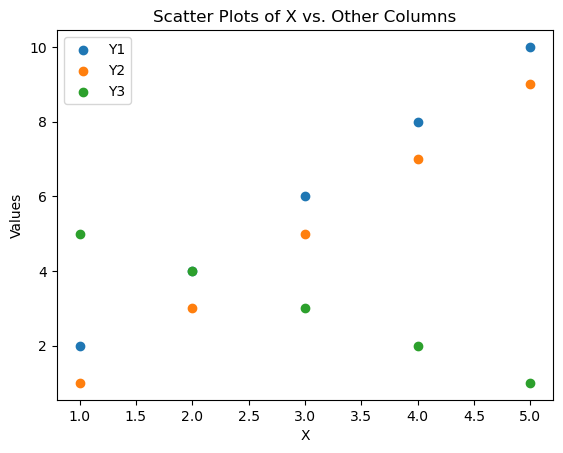

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'X': [1, 2, 3, 4, 5],
    'Y1': [2, 4, 6, 8, 10],
    'Y2': [1, 3, 5, 7, 9],
    'Y3': [5, 4, 3, 2, 1]
}
df = pd.DataFrame(data)

# The column you want to use as X-axis
x_column = 'X'

# Create scatter plots for the relationship between 'X' and the other columns
for column in df.columns:
    if column != x_column:
        plt.scatter(df[x_column], df[column], label=column)

# Add labels, legend, and title
plt.xlabel(x_column)
plt.ylabel("Values")
plt.legend()
plt.title(f"Scatter Plots of {x_column} vs. Other Columns")

# Show the plot
plt.show()



# Box plot

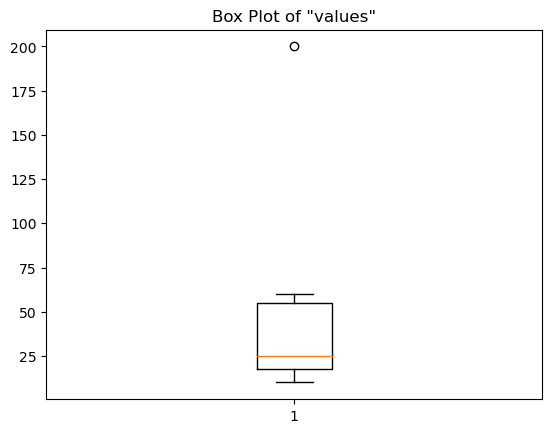

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {'values': [10, 15, 20, 25, 50, 60, 200]}
df = pd.DataFrame(data)

# Create a box plot
plt.boxplot(df['values'])
plt.title('Box Plot of "values"')
plt.show()


In [13]:
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['values'] >= Q1 - 1.5 * IQR) & (df['values'] <= Q3 + 1.5 * IQR)]


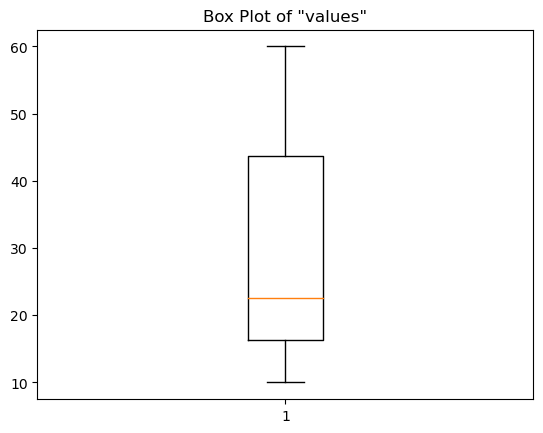

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample DataFrame
# data = {'values': [10, 15, 20, 25, 50, 60, 200]}
# df = pd.DataFrame(data)

# Create a box plot
plt.boxplot(df_no_outliers['values'])
plt.title('Box Plot of "values"')
plt.show()


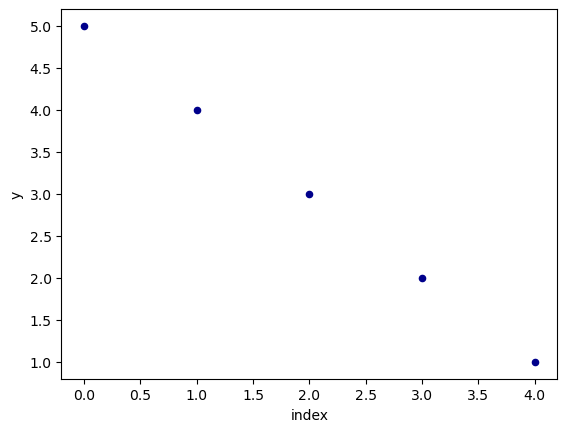

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df'
df = pd.DataFrame({
    'y': [5, 4, 3, 2, 1]
})

df.reset_index().plot.scatter(x='index', y='y', c='DarkBlue')
plt.show()


# Gender Prediction using first name

In [ ]:
!pip install gender_guesser

In [1]:


import pandas as pd
import gender_guesser.detector as gender

# Assuming you have a DataFrame 'df' with a column 'first_name'
df = pd.DataFrame({'first_name': ['ajay', 'amit', 'raj', 'mona', 'sema']})

gd = gender.Detector(case_sensitive=False)

# Capitalize the names before passing them into the guesser
df['Gender'] = df['first_name'].apply(str.capitalize).map(gd.get_gender)

print(df)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 3.0 MB/s eta 0:00:00a 0:00:01
  first_name       Gender
0       ajay         male
1       amit         male
2        raj  mostly_male
3       mona       female
4       sema       female


In [3]:
gd = gender.Detector(case_sensitive=False)
name = 'IVETTE'
gender = gd.get_gender(name.capitalize())

print(f'The predicted gender for {name} is {gender}.')

The predicted gender for IVETTE is female.


In [24]:
name = 'IVETTE'
word = "GARRENJIM"

# Separate the word based on uppercase letters
import re
separated_word = re.findall('[A-Z][^A-Z]*', word)

print(separated_word)

name.lowar()

['G', 'A', 'R', 'R', 'E', 'N', 'J', 'I', 'M']


AttributeError: 'str' object has no attribute 'lowar'

# Datetime Work

In [5]:
import pandas as pd

# Create a sample DataFrame with the 'dob' column
data = {
    'dob': ['1990-04-05 00:00:00', '1993-07-13', '1991-10-10', '1984-04-19', '1999-09-22', '6/7/1993', '1978-07-14', '1986-02-06', '1951-05-02']
}

df = pd.DataFrame(data)

# Convert the 'dob' column to a consistent date format
df['dob'] = pd.to_datetime(df['dob'], errors='coerce').dt.strftime('%Y-%m-%d')

# Print the DataFrame with dates in the desired format
print(df)


          dob
0  1990-04-05
1  1993-07-13
2  1991-10-10
3  1984-04-19
4  1999-09-22
5  1993-06-07
6  1978-07-14
7  1986-02-06
8  1951-05-02


In [11]:
import pandas as pd

# Create a sample DataFrame with the 'dob' column
data = {
    'dob': ['1990-04-05', '1850-07-13', '1991-10-10', '1984-04-19', '2023-09-22', '6/7/1993', '1978-07-14', '1986-02-06', '1951-05-02',  '1850-07-44']
}

df = pd.DataFrame(data)

# Convert the 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Define a range of acceptable years (e.g., 1900 to 2022)
min_year = pd.Timestamp('1900-01-01')
max_year = pd.Timestamp('2022-12-31')

# Filter for inaccuracies
inaccurate_dob = df[(df['dob'] < min_year) | (df['dob'] > max_year)]

# Print the inaccurate DOB values
print(inaccurate_dob)


         dob
1 1850-07-13
4 2023-09-22


In [12]:
import pandas as pd
import re

# Create a sample DataFrame with the 'dob' column
data = {
    'dob': ['1990-04-05', '1850-07-13', '1991-10-10', '1984-04-19', '2023-09-22', '6/7/1993', '1978-07-14', '1986-02-06', '1951-05-02', '1850-07-44']
}

df = pd.DataFrame(data)

# Define a regular expression pattern for valid dates (YYYY-MM-DD)
date_pattern = r'^\d{4}-\d{2}-\d{2}$'

# Filter for inaccuracies
inaccurate_dob = df[~df['dob'].str.match(date_pattern) | (pd.to_datetime(df['dob'], errors='coerce') < pd.Timestamp('1900-01-01')) | (pd.to_datetime(df['dob'], errors='coerce') > pd.Timestamp('2022-12-31'))]

# Print the inaccurate DOB values
print(inaccurate_dob)


          dob
1  1850-07-13
4  2023-09-22
5    6/7/1993


In [16]:
import pandas as pd
from dateutil import parser
import numpy as np

# Create a sample DataFrame with the 'dob' column
data = {
    'dob': ['1990-04-05', '1850-07-13', '1991-10-10', '1984-04-19', '2023-09-22', '6/7/1993', '1978-07-14', '1986-02-06', '1951-05-02', '1850-07-44']
}

df = pd.DataFrame(data)

# Function to replace inconsistent dates with NaN
def replace_inconsistent_dates(date_str):
    try:
        parsed_date = parser.parse(str(date_str), dayfirst=True)
        if not (1900 <= parsed_date.year <= 2022):
            return np.nan
        return parsed_date.strftime('%Y-%m-%d')
    except ValueError:
        return np.nan

# Replace inconsistent dates with NaN
df['dob'] = df['dob'].apply(replace_inconsistent_dates)

# Print the DataFrame with inconsistent dates replaced by NaN
print(df)


          dob
0  1990-05-04
1         NaN
2  1991-10-10
3  1984-04-19
4         NaN
5  1993-07-06
6  1978-07-14
7  1986-06-02
8  1951-02-05
9         NaN


In [3]:
import pandas as pd
import re

# Sample DataFrame with a datetime column
data = {
    'datetime_column': ['2013-08-08 10:44:15', '2023-12-25 08:30:00', '2023-09-15 14:00:00', 'Invalid Date', '2023-09-15']
}

df = pd.DataFrame(data)

# Define a regex pattern for 'YYYY-MM-DD HH:MM:SS' format
datetime_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'

# Check if the datetime values in the 'datetime_column' match the pattern
not_in_desired_format = df[~df['datetime_column'].str.contains(datetime_pattern, na=False)]

# Print the rows with datetime values not in the desired format
print(not_in_desired_format)


  datetime_column
3    Invalid Date
4      2023-09-15


In [6]:
import pandas as pd

# Sample DataFrame with a datetime column
data = {
    'datetime_column': ['2013-08-08 10:44:15', '2023-12-25 08:30:00', '2023-09-15 14:00:00', 'Invalid Date', '2023-09-15']
}

df = pd.DataFrame(data)

# Check if the datetime values in the 'datetime_column' can be formatted as 'YYYY-MM-DD HH:MM:SS'
not_in_desired_format = df[df['datetime_column'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y-%m-%d %H:%M:%S') is pd.NaT)]

# Print the rows with datetime values not in the desired format
print(not_in_desired_format)


  datetime_column
3    Invalid Date


In [16]:
import pandas as pd

# Sample DataFrame with a datetime column
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8],
    'value': ['A', 'B', 'A', 'C', 'B', 'D', 'A', 'C'],
    'datetime_column': ['2023-01-15 08:00:00', '2023-01-15 08:30:00', '2023-01-15 09:00:00', '2023-01-15 10:00:00',
                       '2023-01-15 11:00:00', '2023-01-15 12:00:00', '2023-01-15 13:00:00', '2023-01-15 14:00:00']
}

df = pd.DataFrame(data)

df

,id,value,datetime_column
0,1,A,2023-01-15 08:00:00
1,2,B,2023-01-15 08:30:00
2,3,A,2023-01-15 09:00:00
3,4,C,2023-01-15 10:00:00
4,5,B,2023-01-15 11:00:00
5,6,D,2023-01-15 12:00:00
6,7,A,2023-01-15 13:00:00
7,8,C,2023-01-15 14:00:00


In [19]:
# # df['your_datetime_column'] = pd.to_datetime(df['your_datetime_column'])

# # Sort by datetime column in descending order so latest dates come first
# df = df.sort_values('datetime_column', ascending=False)

# # Drop duplicates and keep the first one (which is the latest due to sorting)
# df = df.drop_duplicates(keep='first')



# Sort the DataFrame by "created_at" in descending order
df = df.sort_values(by='datetime_column', ascending=False)

# Remove duplicates based on "created_at" and retain the latest occurrence
df = df.drop_duplicates(keep='first')

# Reset the index if needed
df = df.reset_index(drop=True)

# Print the resulting DataFrame
print(df)


   id value      datetime_column
0   8     C  2023-01-15 14:00:00
1   7     A  2023-01-15 13:00:00
2   6     D  2023-01-15 12:00:00
3   5     B  2023-01-15 11:00:00
4   4     C  2023-01-15 10:00:00
5   3     A  2023-01-15 09:00:00
6   2     B  2023-01-15 08:30:00
7   1     A  2023-01-15 08:00:00


In [18]:
df

,id,value,datetime_column
7,8,C,2023-01-15 14:00:00
6,7,A,2023-01-15 13:00:00
5,6,D,2023-01-15 12:00:00
4,5,B,2023-01-15 11:00:00
3,4,C,2023-01-15 10:00:00
2,3,A,2023-01-15 09:00:00
1,2,B,2023-01-15 08:30:00
0,1,A,2023-01-15 08:00:00


In [6]:
# Convert the 'datetime_column' to datetime objects
df['datetime_column'] = pd.to_datetime(df['datetime_column'])

# Sort the DataFrame by 'datetime_column' in descending order
df = df.sort_values(by='datetime_column', ascending=False)

# Remove duplicates and retain the latest occurrence
df = df.drop_duplicates(subset='value', keep='first')

# Reset the index if needed
df = df.reset_index(drop=True)

# Print the resulting DataFrame
print(df)


   id value     datetime_column
0   8     C 2023-01-15 14:00:00
1   7     A 2023-01-15 13:00:00
2   6     D 2023-01-15 12:00:00
3   5     B 2023-01-15 11:00:00


In [9]:
df['datetime_column']

0    2023-01-15 08:00:00
1    2023-01-15 08:30:00
2    2023-01-15 09:00:00
3    2023-01-15 10:00:00
4    2023-01-15 11:00:00
5    2023-01-15 12:00:00
6    2023-01-15 13:00:00
7    2023-01-15 14:00:00
Name: datetime_column, dtype: object

In [11]:
df = df.sort_values('datetime_column', ascending=False)

# Drop duplicates and keep the first one (which is the latest due to sorting)
df = df.drop_duplicates(subset='value', keep='first')

In [12]:
df

,id,value,datetime_column
7,8,C,2023-01-15 14:00:00
6,7,A,2023-01-15 13:00:00
5,6,D,2023-01-15 12:00:00
4,5,B,2023-01-15 11:00:00


In [31]:
import pandas as pd
import gender_guesser.detector as gender

# Sample DataFrame
data = {
    'fname': ['IVETTE', 'GracielaRios', None, 'DARRICK', 'FELKER', 'David'],
    'lname': ['CASILLAS', None, None, 'BROWN', 'NITA', None],
    'gender': ['F', 'F', None, 'M', 'F', None]
}

df = pd.DataFrame(data)

# Function to predict gender based on the first name
def predict_gender(first_name):
    global gender
    if first_name is None:
        return None
    gd = gender.Detector(case_sensitive=False)
    gender = gd.get_gender(first_name.lower().capitalize())
    print('name:', first_name, 'gender:', gender)
    return gender

# Update the "gender" column where it's None using the predict_gender function
df['gender'] = df.apply(lambda row: predict_gender(row['fname']) if pd.isna(row['gender']) else row['gender'], axis=1)

# Print the updated DataFrame
print(df)


name: David gender: male
          fname     lname gender
0        IVETTE  CASILLAS      F
1  GracielaRios      None      F
2          None      None   None
3       DARRICK     BROWN      M
4        FELKER      NITA      F
5         David      None   male


In [39]:
import pandas as pd
import re



def process_dataframe(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
#             df[column] = df[column].apply(lambda x: pd.to_numeric(x, errors='coerce') if x.isnumeric() else x)
            df[column] = df[column].apply(lambda x: np.nan if str(x).isdigit() else x)
            
        elif df[column].dtype == 'datetime64[ns]':
            df[column] = pd.to_datetime(df[column], errors='coerce')

    return df


In [50]:
# Sample DataFrame
data = {
    'string_column': ['abc!def', '123', '456', '456', '456'],
    'int_column': [123, 3434, 789, 789, 789],
    'datetime_column': ['2023-01-15', '2022-12-31', 'Invalid Date', '12.34312.3434.23', '543453']
}

df = pd.DataFrame(data)
# df['int_column'] = df['int_column'].astype('int')
# Process the DataFrame
# processed_df = process_dataframe(df)

# Print the processed DataFrame
print(processed_df)
df['datetime_column']

  string_column  int_column datetime_column
0        abcdef         123             NaN
1           NaN        3434             NaN
2           NaN         789    Invalid Date


0          2023-01-15
1          2022-12-31
2        Invalid Date
3    12.34312.3434.23
4              543453
Name: datetime_column, dtype: object

In [56]:
import pandas as pd
# import gender_guesser.detector as gender
import sexmachine.detector as gender

# Sample data
data = {
    'fname': [None, None, None, None, 'May', 'kaitlin', 'kaitlin', 'kaitlin', 'Marco', 'raymond']
}

df = pd.DataFrame(data)

# Initialize the gender detector
d = gender.Detector()

# Function to predict gender for a DataFrame column
def predict_gender_from_df(df, column_name):
    predicted_genders = []
    for fname in df[column_name]:
        if fname is None:
            predicted_genders.append(None)
        else:
            gender_prediction = d.get_gender(fname)
            if gender_prediction in ['male', 'female', 'mostly_male', 'mostly_female']:
                predicted_genders.append(gender_prediction)
            else:
                predicted_genders.append(None)
    
    return predicted_genders

# Add the predicted genders to the DataFrame
df['predicted_gender'] = predict_gender_from_df(df, 'fname')

# Display the DataFrame with predicted genders
print(df)


AttributeError: 'str' object has no attribute 'decode'

In [55]:
pip install SexMachine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for SexMachine: filename=SexMachine-0.1.1-py3-none-any.whl size=379441 sha256=bec5f93ae4066352bbd1bb6ddfccf8e5c3c3170d7fc67b93462f996898f226bc
  Stored in directory: /home/user/data_science/m.osama/.cache/pip/wheels/04/b5/d0/59428a0dd67a75a0c120a72bb7fef826f11ec744ae7905bb04
Successfully built SexMachine
Note: you may need to restart the kernel to use updated packages.


In [94]:
import sexmachine.detector as gender

d = gender.Detector()

AttributeError: 'str' object has no attribute 'decode'

In [97]:

l = ['mark', 'paul', 'Dwayne', 'QUINETTA', 'Jayson', 'Gary']
for i in l:
    print(i.lower().capitalize(), d.get_gender(i.lower().capitalize()))
#     d.get_gender(u"paul")

Mark male
Paul male
Dwayne male
Quinetta unknown
Jayson male
Gary male


In [67]:
l[0].capitalize()

<function str.capitalize()>

# using sexmachine

In [79]:
import pandas as pd

# Sample DataFrame
data = {
    'column_name': ['value1', 'nan', 'value2', 'nan', 'value3']
}

df = pd.DataFrame(data)

# Replace 'nan' with None in the specified column
column_to_check = 'column_name'
df[column_to_check] = df[column_to_check].apply(lambda x: None if x == 'nan' else x)

# Print the updated DataFrame
print(df)


AttributeError: 'str' object has no attribute 'decode'

In [96]:
from genderize import Genderize

# Create a Genderize instance
genderize = Genderize()

def predict_gender_from_df(df, column_name):
    count = 0
    predicted_genders = []
    for fname in df[column_name]:
        print('name: ', fname)
        
        if fname is None:
            predicted_genders.append(None)
        else:
            gender_prediction = d.get_gender(fname.lower().capitalize())
            gen = ''
            if gender_prediction == 'male':
                gen = "M" 
                predicted_genders.append(gen)
                print(' ----predicted: ', gender_prediction)
            elif gender_prediction == 'female':
                gen = "F"
                predicted_genders.append(gen)
                print(' ----predicted: ', gender_prediction)
            else:
                predicted_genders.append(None)
        print('rows done: ', count)
        count +=1
    
    return predicted_genders


# Sample DataFrame
data = {
    'fname': [None, 'CYNTHIA', 'May', 'MARIEPAULE', 'Andrea', 'MELISSA'],
    'lname': [None, 'LENOARD', 'Nicholson', 'WILLEM', 'Richardson', 'FELAN'],
    'gender': [None, 'F', 'F', 'M', 'F', None]
}

df = pd.DataFrame(data)

# Add a new column with predicted genders
df['predicted_gender'] = predict_gender_from_df(df, 'fname')

# Print the updated DataFrame
print(df)


name:  None
rows done:  0
name:  CYNTHIA
 ----predicted:  female
rows done:  1
name:  May
 ----predicted:  female
rows done:  2
name:  MARIEPAULE
rows done:  3
name:  Andrea
 ----predicted:  female
rows done:  4
name:  MELISSA
 ----predicted:  female
rows done:  5
        fname       lname gender predicted_gender
0        None        None   None             None
1     CYNTHIA     LENOARD      F                F
2         May   Nicholson      F                F
3  MARIEPAULE      WILLEM      M             None
4      Andrea  Richardson      F                F
5     MELISSA       FELAN   None                F


In [98]:
import pandas as pd
import numpy as np

# Create a dummy DataFrame
data = {'column_name': ['http://example.com', 'www.example.com', 'No http or www here', 'http://another-example.com', 'Just a normal string']}
df = pd.DataFrame(data)

print("Before replacement:")
print(df)

# Replace strings containing 'http' or 'www' with None
df['column_name'] = df['column_name'].replace(r'http\\S+|www.\\S+', np.nan, regex=True)

print("\nAfter replacement:")
print(df)


Before replacement:
                  column_name
0          http://example.com
1             www.example.com
2         No http or www here
3  http://another-example.com
4        Just a normal string

After replacement:
                  column_name
0          http://example.com
1             www.example.com
2         No http or www here
3  http://another-example.com
4        Just a normal string


In [105]:
import pandas as pd
import numpy as np

# Create a dummy DataFrame
data = {'column_name': ['http://example.com', 'www.example.com', 'No http or www here', 'http://another-example.com', 'Just a normal string', None]}
df = pd.DataFrame(data)

print("Before replacement:")
print(df)

# Replace strings containing 'http' or 'www' with None
df['column_name'] = df['column_name'].apply(lambda x: None if x is not None and any(substring in x for substring in ['http', 'www']) else x)

print("\nAfter replacement:")
print(df)


Before replacement:
                  column_name
0          http://example.com
1             www.example.com
2         No http or www here
3  http://another-example.com
4        Just a normal string
5                        None

After replacement:
            column_name
0                  None
1                  None
2                  None
3                  None
4  Just a normal string
5                  None


In [109]:
import pandas as pd

# Sample DataFrame
data = {
    'ip_address': ['12.123.12.23', '123.12.12.23', '12.23.123.23', '12.23.12.235', '12.23.12.235.235']
}

df = pd.DataFrame(data)

# Define a regular expression pattern for valid IP formats
pattern = r'^(12\.123\.12\.23|123\.12\.12\.23|12\.23\.123\.23|12\.23\.12\.235)$'

# Check if the 'ip_address' column does not match the valid IP pattern
invalid_ips = df[df['ip_address'].str.match(pattern)]

# Print the rows with invalid IP formats
print(invalid_ips)


     ip_address
0  12.123.12.23
1  123.12.12.23
2  12.23.123.23
3  12.23.12.235


In [110]:
import pandas as pd
import numpy as np
import re

# Sample DataFrame
data = {
        'ip_address': ['12.123.12.23', '123.12.12.23', '12.23.123.23', '12.23.12.235', '12.23.12.235.235']

}

df = pd.DataFrame(data)

# Define a regular expression pattern for valid IP formats
pattern = r'^(12\.123\.12\.23|123\.12\.12\.23|12\.23\.123\.23|12\.23\.12\.235)$'

# Function to check the format and replace with NaN if not valid
def validate_ip(value):
    if re.match(pattern, value):
        return value
    else:
        return np.nan

# Apply the function to the 'ip_address' column
df['ip_address'] = df['ip_address'].apply(validate_ip)

# Print the updated DataFrame
print(df)


     ip_address
0  12.123.12.23
1  123.12.12.23
2  12.23.123.23
3  12.23.12.235
4           NaN


In [111]:
import pandas as pd
import numpy as np
import re

# Sample DataFrame
data = {
    'ip_address': ['12.123.12.23', '123.12.12.23', '12.23.123.23', '12.23.12.235', 'invalid_ip']
}

df = pd.DataFrame(data)

# Define a regular expression pattern for valid IP formats
pattern = r'^(12\.123\.12\.23|123\.12\.12\.23|12\.23\.123\.23|12\.23\.12\.235)$'

# Use a lambda function with apply to check the format and replace with NaN if not valid
df['ip_address'] = df['ip_address'].apply(lambda x: x if re.match(pattern, x) else np.nan)

# Print the updated DataFrame
print(df)


     ip_address
0  12.123.12.23
1  123.12.12.23
2  12.23.123.23
3  12.23.12.235
4           NaN


## check invalid ip format

In [9]:
import pandas as pd
import re

# Sample DataFrame
data = {
    'customer_ip': ['12.123.12.23', '123.12.12.23', '12.23.123.23', '12.23.12.235', None, 'invalid_ip']
}

df = pd.DataFrame(data)

# Define a regular expression pattern for valid IP formats
pattern = r'^(12\.123\.12\.23|123\.12\.12\.23|12\.23\.123\.23|12\.23\.12\.235)$'

# Use a lambda function to check for valid IP addresses or set to None
df['ip_address'] = df['customer_ip'].apply(lambda x: x if (pd.notnull(x) and re.match(pattern, x)) else None)

# Print the updated DataFrame
print(df)



    customer_ip    ip_address
0  12.123.12.23  12.123.12.23
1  123.12.12.23  123.12.12.23
2  12.23.123.23  12.23.123.23
3  12.23.12.235  12.23.12.235
4          None          None
5    invalid_ip          None


# Merging

In [15]:
import pandas as pd
import numpy as np

# Create DataFrame A
data_A = {
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35]
}
df_A = pd.DataFrame(data_A)

# Create DataFrame B
data_B = {
    'id': [2, 3, 4],
    'city': ['New York', 'Los Angeles', 'Chicago'],
    'job': ['Engineer', 'Designer', 'Teacher']
}
df_B = pd.DataFrame(data_B)
print(df_A)
print(df_B)


   id     name  age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
   id         city       job
0   2     New York  Engineer
1   3  Los Angeles  Designer
2   4      Chicago   Teacher


In [24]:
import pandas as pd
import numpy as np

# Create DataFrame A
data_A = {
    'a_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35],
    'datetime_column': ['2023-01-15 08:00:00', '2023-01-15 08:30:00', '2023-01-15 09:00:00']
    
}
df_A = pd.DataFrame(data_A)

# Create DataFrame B
data_B = {
    'id': [2, 3, 4],
    'city': ['New York', 'Los Angeles', 'Chicago'],
    'job': ['Engineer', 'Designer', 'Teacher'],
    'datetime_column': ['2023-01-15 08:00:00', '2023-01-15 08:30:00', '2023-01-15 09:00:00']
}
df_B = pd.DataFrame(data_B)

# Merge DataFrames A and B based on 'id', filling missing values with NaN
merged_df = pd.merge(df_A, df_B, left_on='a_id',right_on = 'id',  how='left' )

merged_df.drop('id', axis=1, inplace=True)

# Print the merged DataFrame
# print(merged_df)

# Print the merged DataFrame
# print(merged_df)
merged_df

,a_id,name,age,datetime_column_x,city,job,datetime_column_y
0,1,Alice,25,2023-01-15 08:00:00,NaN,NaN,NaN
1,2,Bob,30,2023-01-15 08:30:00,New York,Engineer,2023-01-15 08:00:00
2,3,Charlie,35,2023-01-15 09:00:00,Los Angeles,Designer,2023-01-15 08:30:00


In [1]:
import nltk
from nltk.corpus import names

def is_name(word):
    return word in set(names.words())


In [6]:
is_name('june')

False

In [9]:
check_names = {'hello', 'mark', 'june', 'james', 'pjsndadjlascnmlasdkasd'}
for i in check_names:
    print(i, is_name(i))

james True
hello False
mark True
pjsndadjlascnmlasdkasd False
june True


In [8]:
import gender_guesser.detector as gender

# Initialize the gender detector
gd = gender.Detector(case_sensitive=False)

# Function to check if a string is a name
def is_name(input_string):
    gender_prediction = gd.get_gender(input_string)
    
    # Check if the prediction indicates a name
    return gender_prediction != 'unknown' and gender_prediction != 'andy'

# Test the function
input_string = 'pjsndadjlascnmlasdkasd '
if is_name(input_string):
    print(f"{input_string} is a name.")
else:
    print(f"{input_string} is not a name.")


pjsndadjlascnmlasdkasd  is not a name.


In [1]:
import pandas as pd
from datetime import datetime

# Sample DataFrame
data = {'date': ["1955-10-30", "1960-12-25", "1975-08-15"]}
df = pd.DataFrame(data)

# Define a function to convert a date string to ISO 8601 format
def convert_to_iso(date_str):
    input_format = "%Y-%m-%d"
    date_obj = datetime.strptime(date_str, input_format)
    iso_date = date_obj.isoformat()
    return iso_date

# Apply the function to the 'date' column
df['date'] = df['date'].apply(convert_to_iso)

print(df)


                  date
0  1955-10-30T00:00:00
1  1960-12-25T00:00:00
2  1975-08-15T00:00:00


In [3]:
df = pd.read_csv('df_q1_2023_orders_joined.csv')

/tmp/ipykernel_257812/1790285445.py:1: DtypeWarning: Columns (28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_q1_2023_orders_joined.csv')


In [4]:
df.dtypes

action_date                             object
company_id                               int64
company_team_id                          int64
company_server_id                        int64
compaing_id                              int64
marketer_id                              int64
brand_id                                 int64
communication_channel_id                 int64
offer_id                               float64
offer_subject_id                         int64
offer_text_id                            int64
offer_tag_id                             int64
offer_category_id                      float64
customers_profile_id                     int64
customer_id                              int64
customer_ip                             object
geo_location_id                        float64
revenue                                float64
dob                                     object
dob_created_at                          object
first_subscribtion_date                 object
last_subscrib

In [10]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with a floating-point column
data = {
    'float_column': [91.0, 41.0, 73.0, 41.0, 91.0, 73.0, 73.0, 41.0, np.nan, 41.0]
}
df = pd.DataFrame(data)

# Convert the 'float_column' to integers while handling non-finite values
df['float_column'] = df['float_column'].apply(lambda x: int(x) if pd.notna(x) and np.isfinite(x) else None)

# Print the DataFrame
print(df)


   float_column
0          91.0
1          41.0
2          73.0
3          41.0
4          91.0
5          73.0
6          73.0
7          41.0
8           NaN
9          41.0


In [12]:
df['float_column']

0    91.0
1    41.0
2    73.0
3    41.0
4    91.0
5    73.0
6    73.0
7    41.0
8     NaN
9    41.0
Name: float_column, dtype: float64

In [ ]:
Handle NaN an

In [37]:
import pandas as pd
import numpy as np

data = {
    'id': [91.0, 91.0, 41.0, 41.0, 73.0, np.nan, np.inf, 73.0],
    'a': ['s', 'f', 'r', 'w', 't', 'a', 'w', 'v']
}

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Convert the 'id' column to integers, replacing NaN and infinity with -1 (or any other desired value)
df['id'] = df['id'].replace([np.nan, np.inf], -1).astype(int)

# Now, the 'id' column contains integers with NaN and infinity values replaced by -1
print(df)


   id  a
0  91  s
1  91  f
2  41  r
3  41  w
4  73  t
5  -1  a
6  -1  w
7  73  v
